In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
df1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/scissor_kick.csv')
df2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/scissor_kick.csv')
df3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/scissor_kick.csv')

In [3]:
df1.head()

,Frame,scissor,kick
0,0,88.857464,21.436668
1,1,89.875874,16.080183
2,2,90.542635,14.273051
3,3,92.344677,15.002378
4,4,88.292513,14.896801


Text(0, 0.5, 'C2 out-of-plane "kick" angle [deg]')

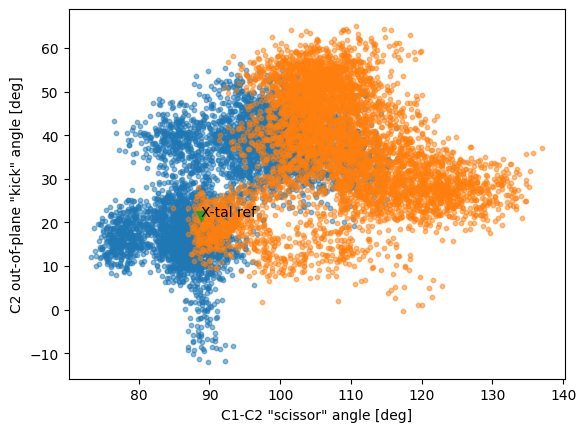

In [4]:
fig, ax = plt.subplots()

ax.scatter(df1.scissor,df1.kick,alpha=0.5,s=10)
ax.scatter(df2.scissor,df2.kick,alpha=0.5,s=10)
#ax.scatter(df3.scissor,df3.kick,alpha=0.5,s=10)
ax.scatter(df1.scissor[0],df1.kick[0],marker='v',s=50)

ax.annotate('X-tal ref', (df1.scissor[0], df1.kick[0]),size=10)
ax.set_xlabel('C1-C2 "scissor" angle [deg]')
ax.set_ylabel('C2 out-of-plane "kick" angle [deg]')

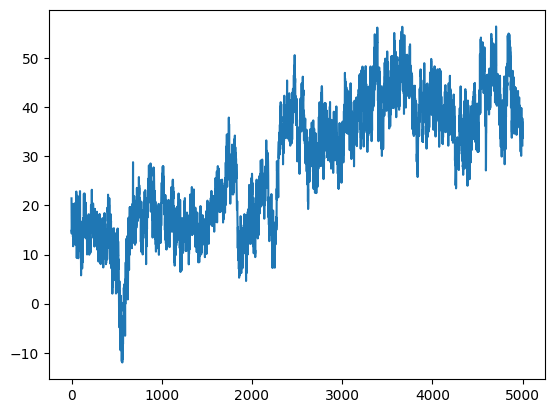

In [5]:
fig, ax = plt.subplots()
ax.plot(df1.Frame,df1.kick)

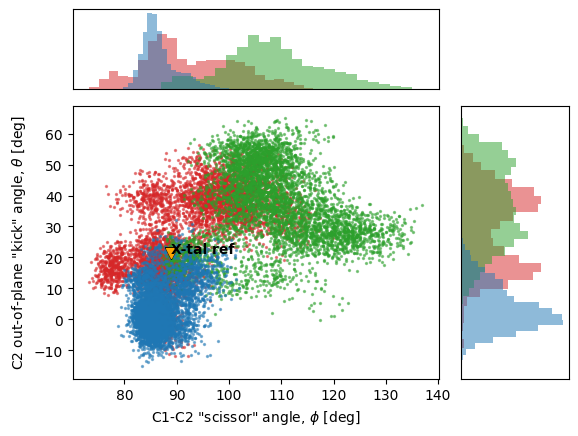

In [6]:
fig = plt.figure()
gs=GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_y = fig.add_subplot(gs[0,0:3])
ax_hist_x = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(df1.scissor,df1.kick,alpha=0.5,s=2,color='tab:red')
ax_scatter.scatter(df2.scissor,df2.kick,alpha=0.5,s=2,color='tab:green')
ax_scatter.scatter(df3.scissor,df3.kick,alpha=0.5,s=2,color='tab:blue')

ax_scatter.scatter(df1.scissor[0],df1.kick[0],marker='v',s=70,c='black')
ax_scatter.scatter(df1.scissor[0],df1.kick[0],marker='v',s=50,c='orange')

ax_hist_y.hist(df1.scissor, color='tab:red', alpha=0.5,bins=25)
ax_hist_y.hist(df2.scissor, color='tab:green', alpha=0.5,bins=25)
ax_hist_y.hist(df3.scissor, color='tab:blue', alpha=0.5,bins=25)

ax_hist_x.hist(df1.kick, orientation = 'horizontal', color='tab:red', alpha=0.5,bins=25)
ax_hist_x.hist(df2.kick, orientation = 'horizontal', color='tab:green', alpha=0.5,bins=25)
ax_hist_x.hist(df3.kick, orientation = 'horizontal', color='tab:blue', alpha=0.5,bins=25)

#ax_scatter.annotate('X-tal ref', (df1.scissor[0], df1.kick[0]),size=10.1)
ax_scatter.annotate('X-tal ref', (df1.scissor[0], df1.kick[0]),size=10,c='black',weight='bold')

ax_scatter.set_xlabel(r'C1-C2 "scissor" angle, $\phi$ [deg]')
ax_scatter.set_ylabel(r'C2 out-of-plane "kick" angle, $\theta$ [deg]')

ax_hist_x.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax_hist_y.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick.pdf')

In [8]:
from scipy.stats import gaussian_kde

In [9]:
x=pd.concat([df1.scissor,df2.scissor,df3.scissor])
y=pd.concat([df1.kick,df2.kick,df3.kick])
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

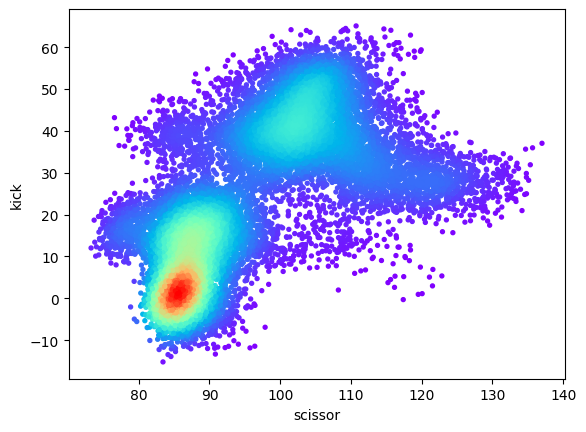

In [12]:
fig, ax = plt.subplots()
plt.scatter(x,y,s=8,cmap = 'rainbow',c=z,marker = 'o')
plt.xlabel('scissor')
plt.ylabel('kick')
#plt.scatter(af_x.dist,af_y.dist,c='black',s=70)
#plt.scatter(af_x.dist,af_y.dist,c='lime',s=50)
#plt.show()
plt.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick_kde.pdf')